In [16]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [17]:
redwine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";", header=0)
redwine["type"] = "red"
whitewine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";", header=0)
whitewine["type"] = "white"
wine = redwine.append(whitewine)

In [18]:
redwine.shape
redwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [19]:
wine.shape  #red+white 전체

(6497, 13)

In [20]:
X= wine.drop(["type", "quality"], axis=1)
X.shape #학습데이터가 됨

(6497, 11)

In [21]:
y= wine.quality #=wine["quality"] attribute로 쓰거나, key value로 쓰거나 동일
print(y.shape)

(6497,)


In [22]:
regr=LinearRegression()

In [23]:
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
r= regr.predict(X)
print( np.mean( np.abs(y-r)))    #5.XX 로 등급을 나누지는 않으니까 정수화 시키는게 좋겠움

0.568315902311135


0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4893    0.0
4894    1.0
4895   -1.0
4896   -1.0
4897    0.0
Name: quality, Length: 6497, dtype: float64


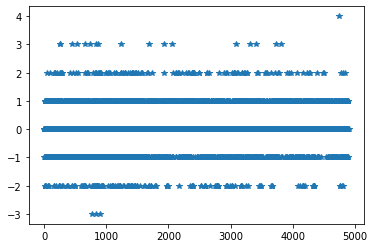

In [26]:
r= regr.predict(X)
print( np.round(r) -y)

result= np.round(r) - y

plt.plot(result, '*')

In [28]:
np.round(r)-y==0

0        True
1        True
2        True
3        True
4        True
        ...  
4893     True
4894    False
4895    False
4896    False
4897     True
Name: quality, Length: 6497, dtype: bool

In [29]:
np.sum(np.round(r)-y ==0) # 맞으면 0, 틀리면1이기 때문에 3465개는 정확하게 맞춘것임, 근데 전체중에 3465면 인식률이 50프로정도,,

3465

In [30]:
np.sum( np.abs(np.round(r)-y) <= 1) # 기준을 어떻게 정할건지따라,, 1등급정도의 오차에서는 인식률 90이상 나온다.  

6169

In [31]:
np.sum(   np.abs(np.round(r) - y)  <= 1) / y.size

0.9495151608434662